In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

from fastdownload import download_url

from fastai.vision.all import *
import timm

In [4]:
search_images('gloomhaven',1)

(#1) ['https://2.bp.blogspot.com/-4UDpyhpCQMs/W-iFTLwTHpI/AAAAAAAAKnI/pBSquP4tOY4GwZYm1a-BjXnCU-tMVJ4kQCLcBGAs/s1600/jommojvTQ06zlws3jFPVNA.jpg']

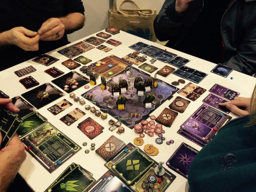

In [5]:
download_url(search_images('gloomhaven boardgame', max_images=1)[0], 'game.jpg', show_progress=True)
Image.open('game.jpg').to_thumb(256,256)

In [6]:
path = Path('boardgame-pictures')

Uncleaned Searches is for a dictionary giving the correct board game names in the end

In [7]:
searches='Gloomhaven','Brass Birmingham','Pandemic Legacy Season 1','Ark Nova','Terraforming Mars','Gloomhaven Jaws of the Lion','Twilight Imperium Fourth Edition','Star Wars Rebellion','Gaia Project','War of the Ring Second Edition','Spirit Island','Through the Ages A New Story of Civilization','Great Western Trail','Twilight Struggle','Dune Imperium','Scythe','The Castles of Burgundy','Nemesis','7 Wonders Duel','Brass Lancashire','Concordia','A Feast for Odin','Terra Mystica','Wingspan','Arkham Horror The Card Game','Clank Legacy Acquisitions Incorporated','Eclipse Second Dawn for the Galaxy','Root','Everdell','Viticulture Essential Edition','Orleans','Lost Ruins of Arnak','Mage Knight Board Game','Food Chain Magnate','Barrage','Marvel Champions The Card Game','Puerto Rico','Too Many Bones','Caverna The Cave Farmers','Blood Rage','Pax Pamir Second Edition','Agricola','Underwater Cities','The Crew Mission Deep Sea','Anachrony','Maracaibo','Mansions of Madness Second Edition','Pandemic Legacy Season 2','The Crew The Quest for Planet Nine','On Mars','Tzolkin The Mayan Calendar','Power Grid','Clans of Caledonia','Crokinole','Le Havre','Star Wars Imperial Assault','Cascadia','Kingdom Death Monster','Pandemic Legacy Season 0','Mechs vs Minions','Lisboa','The Quacks of Quedlinburg','The Gallerist','Paladins of the West Kingdom','Azul','Android Netrunner','Eclipse','Aeons End','The 7th Continent','Through the Ages A Story of Civilization','Race for the Galaxy','Clank A DeckBuilding Adventure','Five Tribes','Fields of Arle','Teotihuacan City of Gods','Grand Austria Hotel','Agricola Revised Edition','Robinson Crusoe Adventures on the Cursed Island','Kanban EV','The Voyages of Marco Polo','7 Wonders','Lords of Waterdeep','Dominant Species','Sleeping Gods','Great Western Trail Second Edition','Tainted Grail The Fall of Avalon','Architects of the West Kingdom','El Grande','Keyflower','Caylus','Battlestar Galactica The Board Game','Beyond the Sun','Mombasa','Dominion Intrigue','Troyes','Raiders of the North Sea','The Lord of the Rings Journeys in MiddleEarth','Twilight Imperium Third Edition','Eldritch Horror','Lorenzo il Magnifico'

In [8]:
uncleaned_searches="Gloomhaven","Brass: Birmingham","Pandemic Legacy: Season 1","Ark Nova","Terraforming Mars","Gloomhaven: Jaws of the Lion","Twilight Imperium: Fourth Edition","Star Wars: Rebellion","Gaia Project","War of the Ring: Second Edition","Spirit Island","Through the Ages: A New Story of Civilization","Great Western Trail","Twilight Struggle","Dune: Imperium","Scythe","The Castles of Burgundy","Nemesis","7 Wonders Duel","Brass: Lancashire","Concordia","A Feast for Odin","Terra Mystica","Wingspan","Arkham Horror: The Card Game","Clank!: Legacy – Acquisitions Incorporated","Eclipse: Second Dawn for the Galaxy","Root","Everdell","Viticulture Essential Edition","Orléans","Lost Ruins of Arnak","Mage Knight Board Game","Food Chain Magnate","Barrage","Marvel Champions: The Card Game","Puerto Rico","Too Many Bones","Caverna: The Cave Farmers","Blood Rage","Pax Pamir: Second Edition","Agricola","Underwater Cities","The Crew: Mission Deep Sea","Anachrony","Maracaibo","Mansions of Madness: Second Edition","Pandemic Legacy: Season 2","The Crew: The Quest for Planet Nine","On Mars","Tzolk'in: The Mayan Calendar","Power Grid","Clans of Caledonia","Crokinole","Le Havre","Star Wars: Imperial Assault","Cascadia","Kingdom Death: Monster","Pandemic Legacy: Season 0","Mechs vs. Minions","Lisboa","The Quacks of Quedlinburg","The Gallerist","Paladins of the West Kingdom","Azul","Android: Netrunner","Eclipse","Aeon's End","The 7th Continent","Through the Ages: A Story of Civilization","Race for the Galaxy","Clank!: A Deck-Building Adventure","Five Tribes","Fields of Arle","Teotihuacan: City of Gods","Grand Austria Hotel","Agricola (Revised Edition)","Robinson Crusoe: Adventures on the Cursed Island","Kanban EV","The Voyages of Marco Polo","7 Wonders","Lords of Waterdeep","Dominant Species","Sleeping Gods","Great Western Trail (Second Edition)","Tainted Grail: The Fall of Avalon","Architects of the West Kingdom","El Grande","Keyflower","Caylus","Battlestar Galactica: The Board Game","Beyond the Sun","Mombasa","Dominion: Intrigue","Troyes","Raiders of the North Sea","The Lord of the Rings: Journeys in Middle-Earth","Twilight Imperium: Third Edition","Eldritch Horror","Lorenzo il Magnifico"

In [9]:
search_dict=dict(zip(searches,uncleaned_searches))
#search_dict

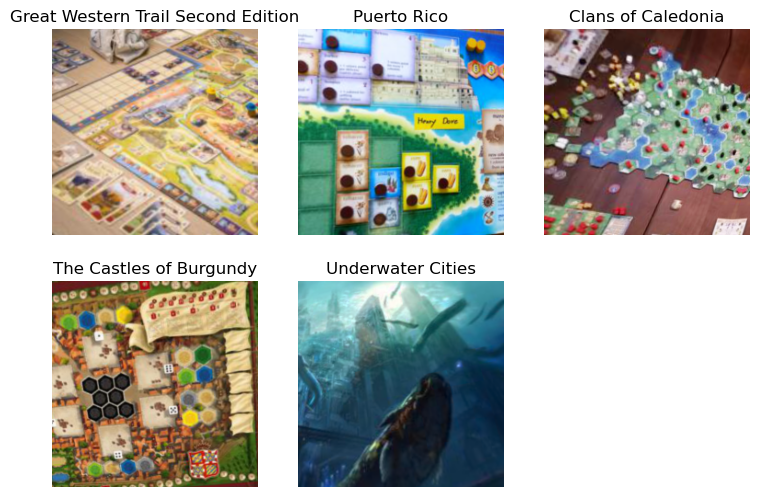

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    #item_tfms=[Resize(192, method='squish')]
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
).dataloaders(path)

dls.show_batch(max_n=5)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/home/jonas/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/jonas/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,5.204089,2.885440,0.645120,01:07


epoch,train_loss,valid_loss,error_rate,time
0,3.009165,2.137231,0.504436,00:17
1,2.297015,1.645553,0.380228,00:16
2,1.781408,1.550707,0.353612,00:18


In [12]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.411613,1.447343,0.334601,00:19


epoch,train_loss,valid_loss,error_rate,time
0,1.171263,1.268706,0.288973,00:18
1,0.986489,1.222872,0.280101,00:16


In [13]:
interp=ClassificationInterpretation.from_learner(learn)

In [14]:
cm=interp.confusion_matrix()

In [15]:
pd.DataFrame(cm).to_csv('CM.csv')

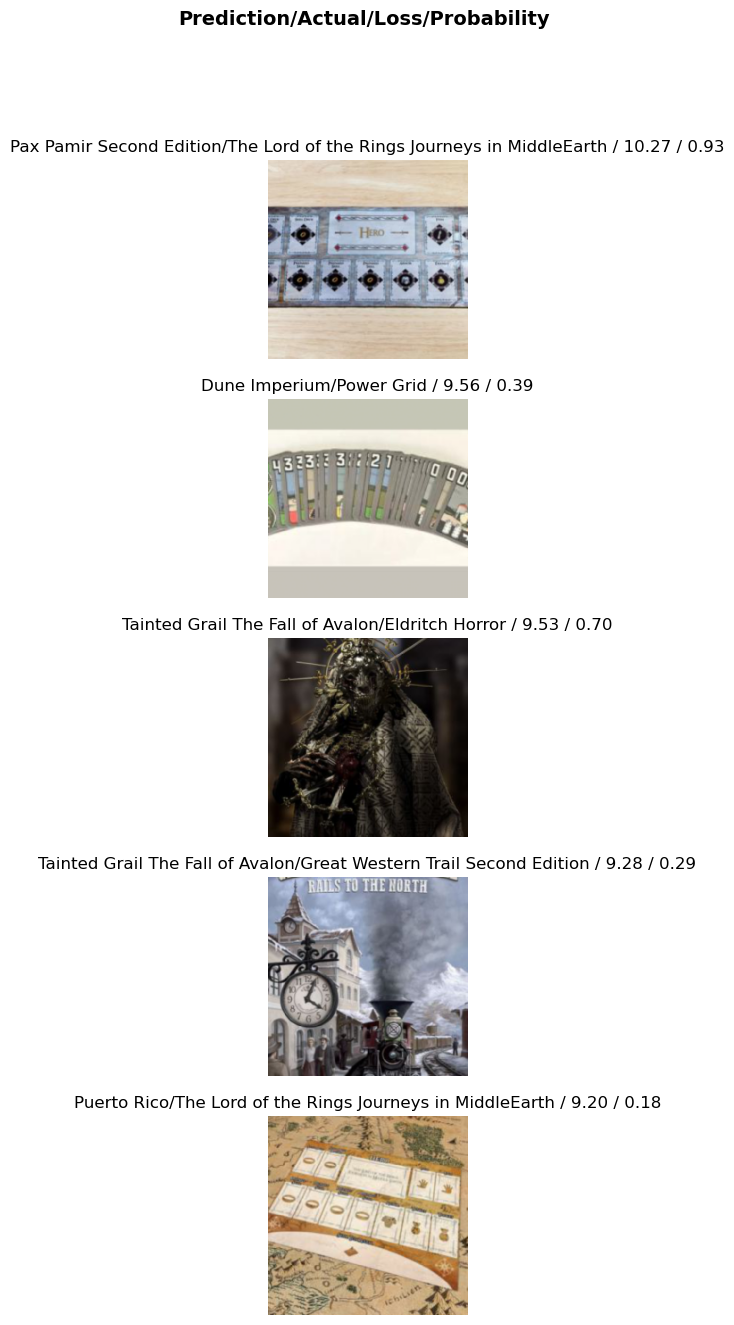

In [29]:
interp.plot_top_losses(5,nrows=5)

In [18]:
from fastai.vision.widgets import *

In [19]:
cleaner = ImageClassifierCleaner(learn)

In [20]:
cleaner

In [21]:
# Delete images marked as delete
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
    
    
# Update category of image to the newly specified category by moving # it into the appropriate folder
for idx,cat in cleaner.change(): shutil.move(cleaner.fns[idx], path/cat)